<a href="https://colab.research.google.com/github/irfannhkm/PCVK_GANJIL_24-25/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 12 - Feature Matching, Face Detection, Face Tracking

|||
|-|-|
|Nama|Muhammad Irfan Nur Hakim|
|Kelas|TI-3F|
|NIM|2241720230|
|Absen|`15`|
|||


<h3 align="left">Connect with me:</h3>
<p align="left">
<a href="https://github.com/irfannhkm/PCVK_GANJIL_24-25" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/github.svg" alt="irfan.nhkm" height="30" width="40" /></a>

[LINK GITHUB](https://github.com/irfannhkm/PCVK_GANJIL_24-25)

[LINK GOOGLE COLAB](https://colab.research.google.com/drive/1jBsjsoFKJ1d3gm97a4nV0q45bfe5KZeg?usp=sharing)

## TUGAS PRAKTIKUM

**1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colabterhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. Import beberapa library dan akses folder**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

**2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).**

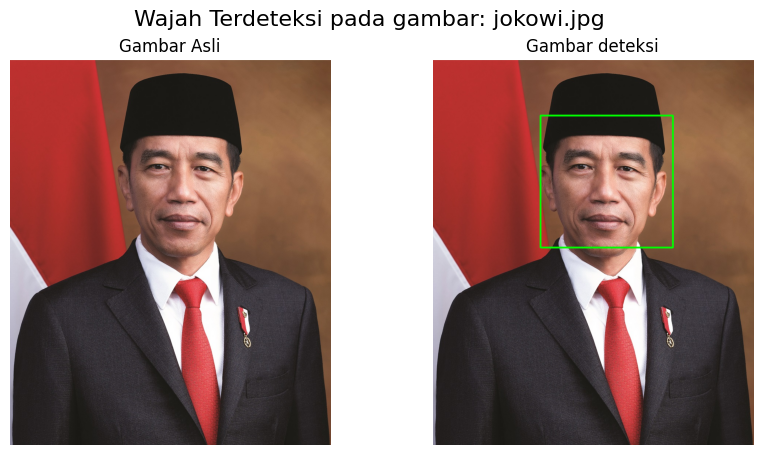

<Figure size 640x480 with 0 Axes>

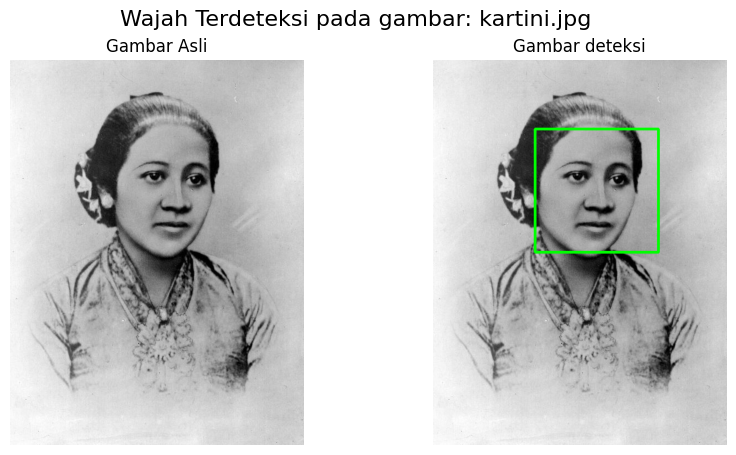

<Figure size 640x480 with 0 Axes>

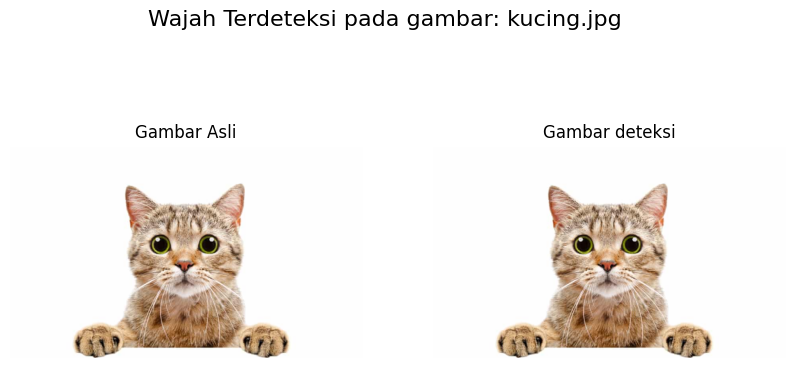

<Figure size 640x480 with 0 Axes>

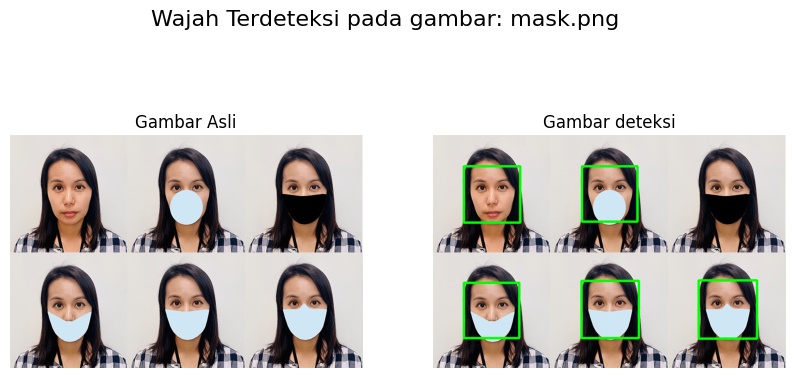

<Figure size 640x480 with 0 Axes>

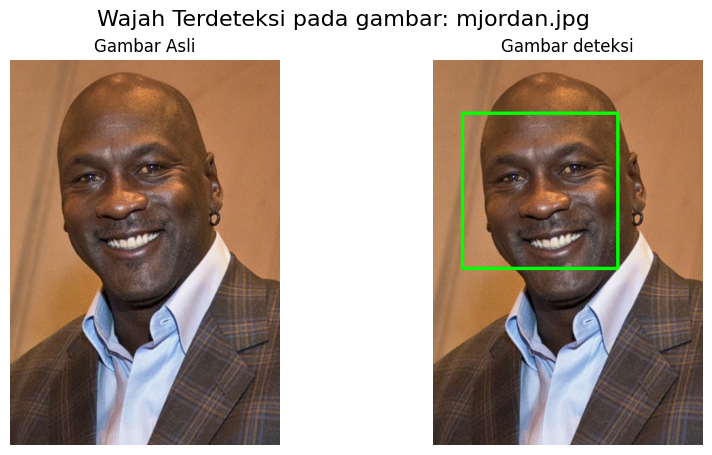

<Figure size 640x480 with 0 Axes>

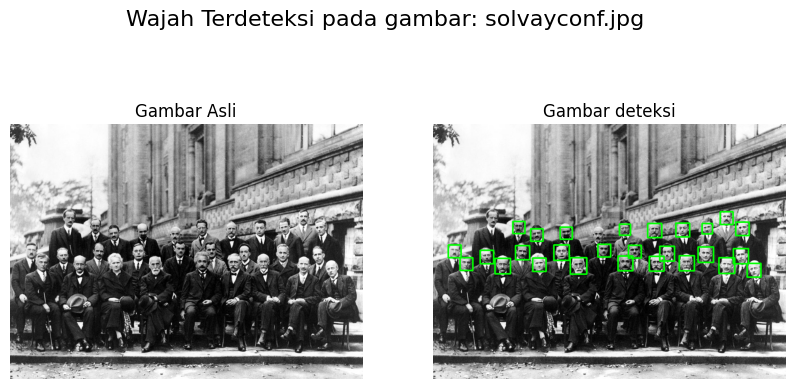

<Figure size 640x480 with 0 Axes>

In [ ]:
# Load file Haar Cascade untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

path_gambar = [
    '/content/drive/MyDrive/PCVK/facedet/jokowi.jpg',
    '/content/drive/MyDrive/PCVK/facedet/kartini.jpg',
    '/content/drive/MyDrive/PCVK/facedet/kucing.jpg',
    '/content/drive/MyDrive/PCVK/facedet/mask.png',
    '/content/drive/MyDrive/PCVK/facedet/mjordan.jpg',
    '/content/drive/MyDrive/PCVK/facedet/solvayconf.jpg',
]

for path in path_gambar:
  original_img = cv.imread(path)
  original_rgb_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)

  deteksi_img = original_img.copy()
  deteksi_rgb_img = cv.cvtColor(deteksi_img, cv.COLOR_BGR2RGB)

  wajah_terdeteksi = cascade_wajah.detectMultiScale(original_rgb_img, scaleFactor= 1.1, minNeighbors=5)

  # Menandai wajah yang terdeteksi dengan kotak
  for (x, y, w, h) in wajah_terdeteksi:
    cv.rectangle(deteksi_rgb_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

  deteksi = 'Wajah Terdeteksi pada gambar: ' + path.split('/')[-1]
  plt.figure(figsize=(10, 5))
  plt.suptitle(deteksi, fontsize= 16)

  plt.subplot(1, 2, 1)
  plt.title('Gambar Asli')
  plt.imshow(original_rgb_img)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title("Gambar deteksi")
  plt.imshow(deteksi_rgb_img)
  plt.axis('off')
  plt.show()
  plt.tight_layout()

**3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.**

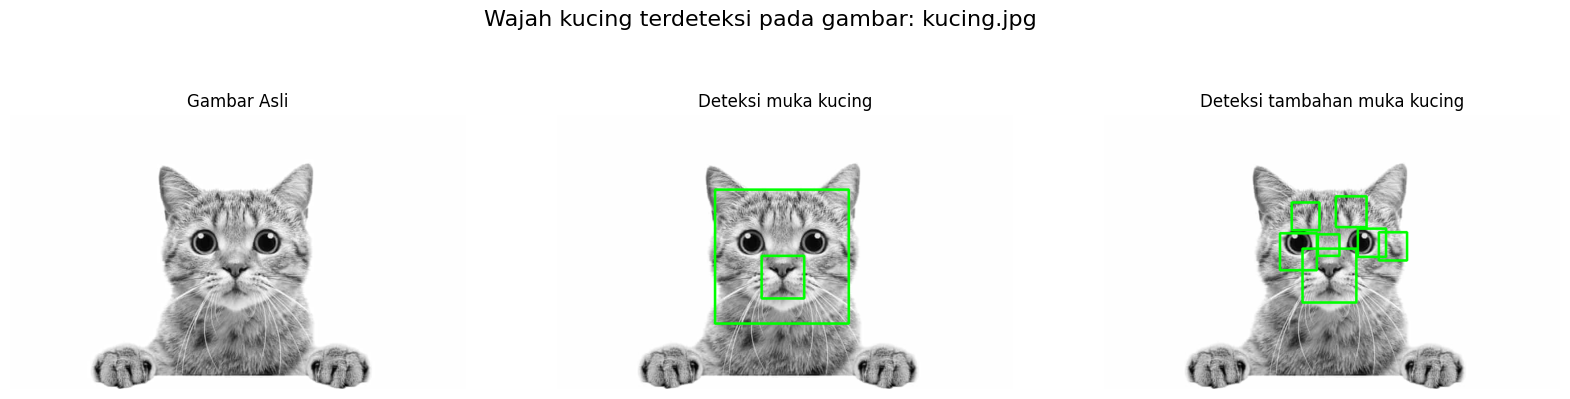

<Figure size 640x480 with 0 Axes>

In [ ]:
# Load file Haar Cascade untuk deteksi wajah kucing
cascade_muka_kucing = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalcatface.xml')
cascade_extended_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalcatface_extended.xml')

original_kucing = cv.imread('/content/drive/MyDrive/PCVK/facedet/kucing.jpg', cv.IMREAD_GRAYSCALE)

# Mendeteksi wajah kucing
roi_kucing = cascade_muka_kucing.detectMultiScale(original_kucing, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
roi_extended_kucing = cascade_extended_cascade.detectMultiScale(original_kucing, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Menandai wajah kucing yang terdeteksi dengan kotak
deteksi_muka_kucing = cv.cvtColor(original_kucing, cv.COLOR_GRAY2RGB)
deteksi_tambahan_kucing = cv.cvtColor(original_kucing, cv.COLOR_GRAY2RGB)

for i, (x, y, w, h) in enumerate(roi_kucing, start=1):
    cv.rectangle(deteksi_muka_kucing, (x, y), (x + w, y + h), (0, 255, 0), 3)

for i, (x, y, w, h) in enumerate(roi_extended_kucing, start=1):
    cv.rectangle(deteksi_tambahan_kucing, (x, y), (x + w, y + h), (0, 255, 0), 3)


title = 'Wajah kucing terdeteksi pada gambar: kucing.jpg'
plt.figure(figsize=(20, 5))
plt.suptitle(title, fontsize=16)

plt.subplot(1, 3, 1)
plt.title('Gambar Asli')
plt.imshow(original_kucing, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Deteksi muka kucing")
plt.imshow(deteksi_muka_kucing)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Deteksi tambahan muka kucing")
plt.imshow(deteksi_tambahan_kucing)
plt.axis('off')
plt.show()
plt.tight_layout()

**4. Cobakan juga untuk eyes detection pada gambar “Jokowi.jpg”.**

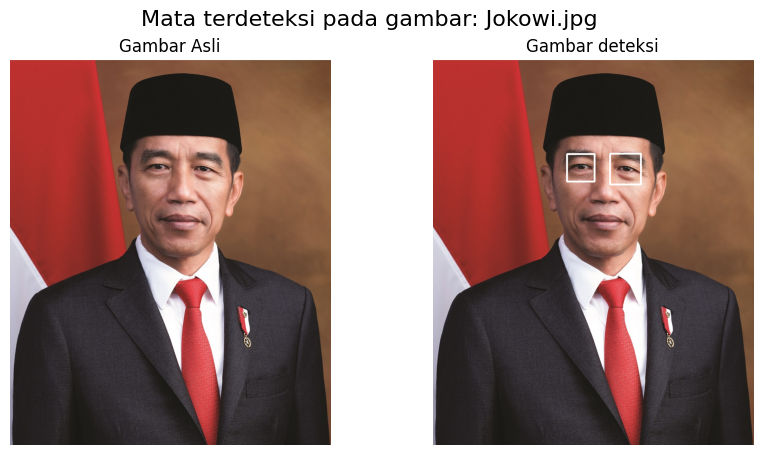

<Figure size 640x480 with 0 Axes>

In [ ]:
# Memuat file Haar Cascade untuk deteksi mata
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_eye.xml')
jokowi_img = cv.imread('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg')

jokowi_rgb_img = cv.cvtColor(jokowi_img, cv.COLOR_BGR2RGB)

# Mendeteksi mata pada gambar Jokowi
roi_mata = cascade_mata.detectMultiScale(jokowi_rgb_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Menandai mata yang terdeteksi dengan kotak putih
for (x, y, w, h) in roi_mata:
    cv.rectangle(jokowi_rgb_img, (x, y), (x + w, y + h), (255, 255, 255), 3)

title = 'Mata terdeteksi pada gambar: Jokowi.jpg'
plt.figure(figsize=(10, 5))
plt.suptitle(title, fontsize=16)

plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(cv.cvtColor(jokowi_img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar deteksi")
plt.imshow(jokowi_rgb_img)
plt.axis('off')
plt.show()
plt.tight_layout()


**5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut ini!.**

In [ ]:
# Import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [ ]:
# Helper funtions
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))

  return bbox_to_bytes


face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# webcam images camera capture
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(0, 0, 255),2)

  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


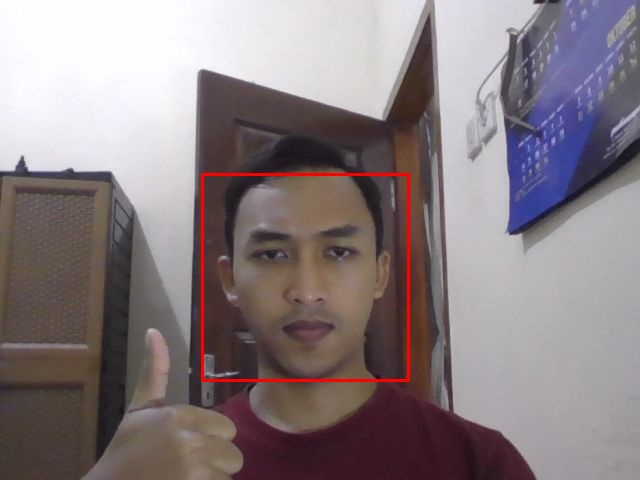

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # show image
  display(Image(filename))
except Exception as err:
  print(str(err))

**6. Lakukan Blurring pada bagian wajah yang terdeteksi. Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring**

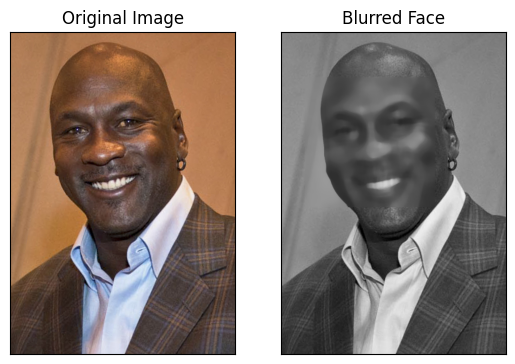

In [ ]:
# Load file Haar Cascade untuk deteksi wajah dan gambar
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
img_jordan = cv.imread('/content/drive/MyDrive/PCVK/facedet/mjordan.jpg')

gray_img = cv.cvtColor(img_jordan, cv.COLOR_BGR2GRAY)

# Menyimpan salinan asli gambar untuk tampilan sebelum blurring
img_jordan_before_blur = img_jordan.copy()
# Mendeteksi wajah dalam gambar
roi_wajah = cascade_wajah.detectMultiScale(gray_img)

# Melakukan blurring pada setiap wajah yang terdeteksi
for (x, y, w, h) in roi_wajah:
    # Memotong wajah yang terdeteksi dari gambar gray_imgscale
    face_roi = gray_img[y:y+h, x:x+w]
    # Menggunakan medianBlur untuk blurring
    blurred_face = cv.medianBlur(face_roi, 15)
    # Mengganti wajah asli dengan wajah yang ter-blur
    gray_img[y:y+h, x:x+w] = blurred_face

title = ['Original Image', 'Blurred Face']
images = [img_jordan_before_blur, gray_img]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB), cmap='gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])
plt.show()

**7. Lakukan segmentasi karakter pada KTP seperti gambar berikut**

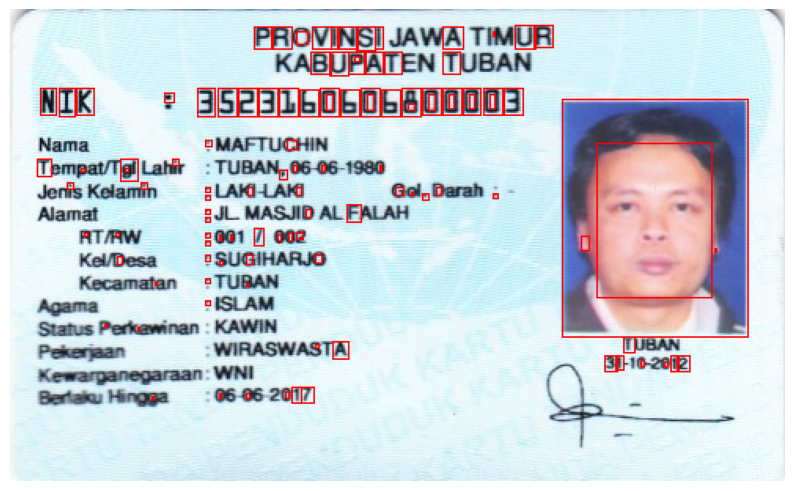

In [ ]:
# Load gambar
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp3.png')

# Gaussian blur
img_blur = cv.GaussianBlur(img_ktp, (5,5), 0.5)

# Convert ke grayscale
img_gray = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)

# Thresholding metode otsu
ret, bw = cv.threshold(img_gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi
erosi = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1,1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erosi.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Looping kontur
for cnt in contours:
    # Mengumpulkan bounding box
    x, y, w, h = cv.boundingRect(cnt)
    ratio = format(w / h, '.2f')  # Rasio lebar terhadap tinggi kotak pembatas
    if h >= 4 and w >= 1 and float(ratio) <= 1:  # Kriteria untuk mendeteksi karakter
        cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ratio) <= 1:  # Kriteria tambahan untuk deteksi karakter kecil
        cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut**

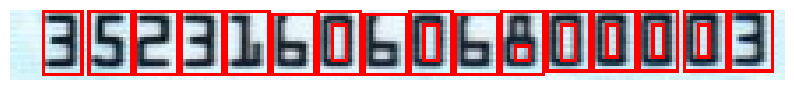

In [ ]:
# Memuat gambar KTP
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp3.png')

# Melakukan Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Mengonversi gambar ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Melakukan thresholding dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Melakukan erosi untuk menghilangkan noise lebih lanjut
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Looping kontur untuk mendeteksi karakter
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ratio = format(w / h, '.2f')  # Rasio lebar terhadap tinggi kotak pembatas
    if h >= 4 and w >= 1 and float(ratio) <= 1:  # Kriteria untuk mendeteksi karakter
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ratio) <= 1:  # Kriteria tambahan untuk deteksi karakter kecil
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menentukan koordinat untuk memotong bagian NIK
cropped_img = ktp[50:70, 110:330]

# Menampilkan gambar hasil cropping NIK
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))  # Mengonversi ke RGB untuk tampilan matplotlib
plt.axis('off')
plt.show()

**9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.**

In [ ]:
# Import library tambahan
import os
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam


# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**10. Lakukan Training Data**

In [ ]:
import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    ZeroPadding2D,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
)
from tensorflow.keras.optimizers import Adam

# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

# Normalize data if not already normalized
X = X / 255.0

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation="relu")(flaten)
fc_layer = Dense(64, activation="relu")(fc_layer)

# Output layer
outputs = Dense(10, activation="softmax")(fc_layer)

# Compile the model
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X, Y, epochs=20, verbose=1)

# Save the model in `.keras` format (recommended) or `.h5`
model.save("anpr.keras")  # Format native Keras

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.1285 - loss: 2.2861
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4146 - loss: 2.1940
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6156 - loss: 1.9200
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6689 - loss: 1.3679
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7385 - loss: 0.9333
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8154 - loss: 0.6474
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8360 - loss: 0.5463
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8619 - loss: 0.4628
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8899 - loss: 0.3828
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8966 - loss: 0.3507
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8903 - loss: 0.3786
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9037 - l

In [ ]:
# Model disimpan dalam format .h5
model.save("anpr_model.h5")

**11. Testing Data**

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9504 - loss: 0.1695
Accuracy on the test set: 95.30%


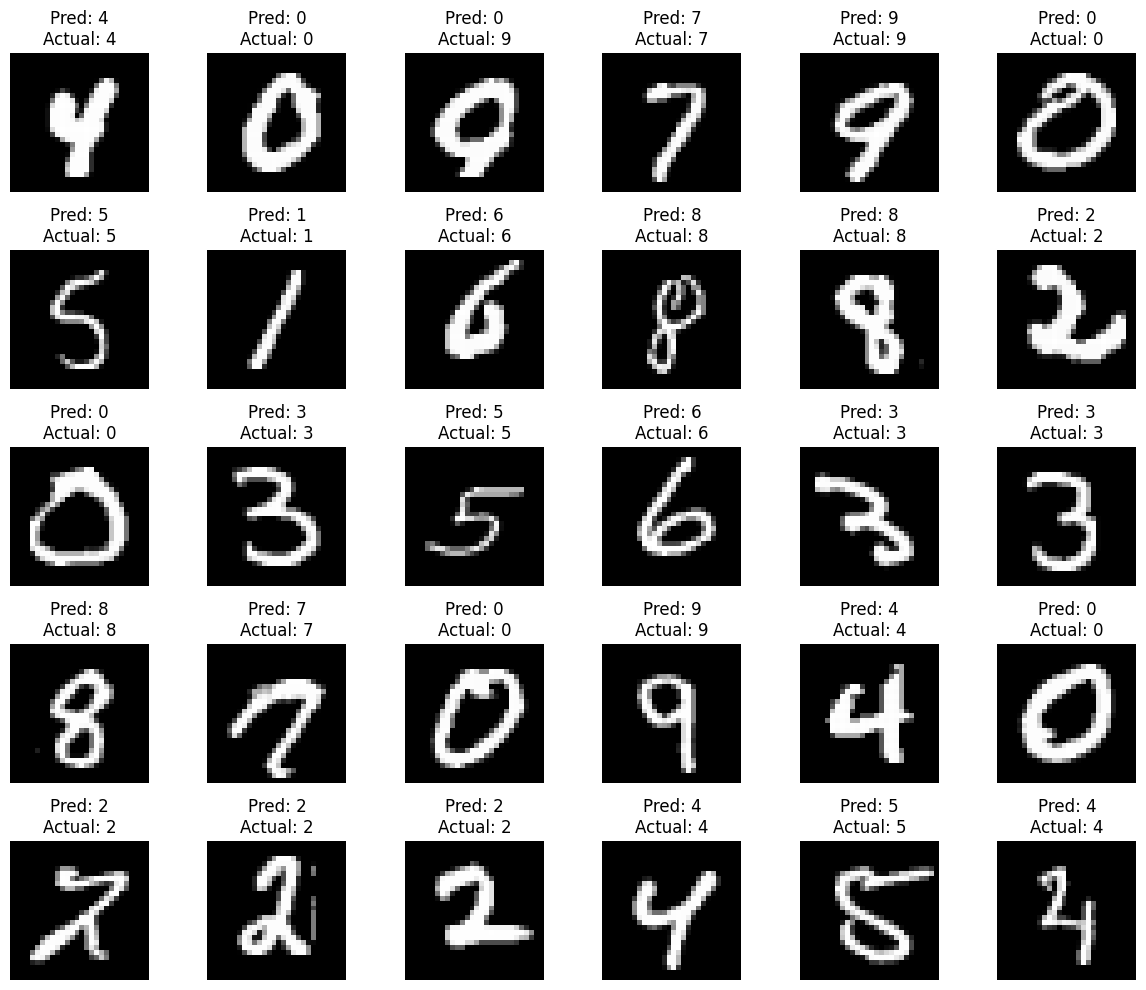

In [ ]:
# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr_model.h5")  # Perbaiki dengan nama file model yang benar

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Mengasumsikan gambar berukuran 28x28 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

## Tugas
**Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!**

**Step 1: prepocessing dan cropping NIK**

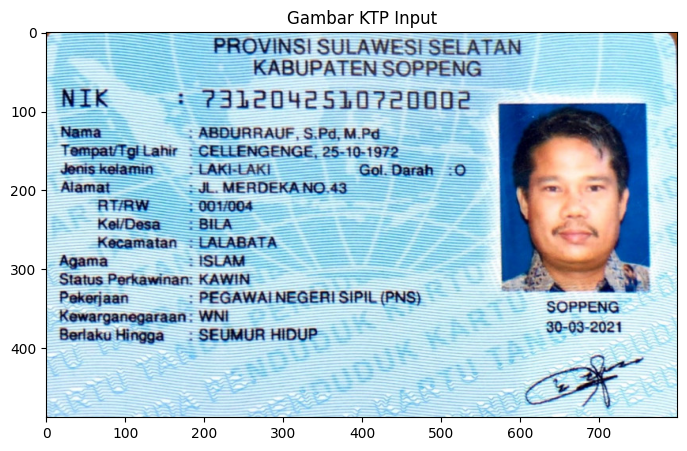

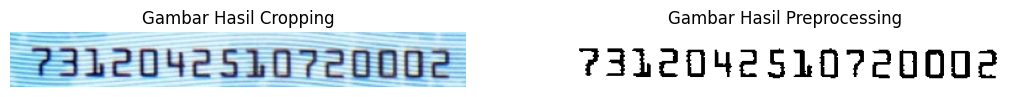

<Figure size 640x480 with 0 Axes>

In [ ]:
# input KTP
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/KTP7.jpeg')

# gaussian Blur untuk mengurangi noise pada gambar
img_blur = cv.GaussianBlur(img_ktp, (5, 5), 0.5)

gray_img = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)

# thresholding Otsu untuk mendapatkan gambar biner
ret, bw = cv.threshold(gray_img.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# erosi untuk menghilangkan noise lebih lanjut
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# memotong gambar untuk mendapatkan NIK
cropped_img = img_ktp[60:105, 180:550]

# gambar yang dipotong menjadi grayscale
cropped_gray = cv.cvtColor(cropped_img, cv.COLOR_BGR2GRAY)

# thresholding biner pada gambar yang telah dipotong
_, cropped_binary = cv.threshold(cropped_gray, 128, 255, cv.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.title('Gambar KTP Input')
plt.imshow(cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB), cmap='gray')


plt.figure(figsize=(20, 5))
plt.subplot(1,3,1),
plt.title('Gambar Hasil Cropping')
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.subplot(1,3,2),
plt.title('Gambar Hasil Preprocessing')
plt.imshow(cropped_binary, cmap='gray')
plt.axis('off')
plt.show()
plt.tight_layout()

**Step 2: mendeteksi kontur angka pada NIK**

Angka yang terdeteksi : 16


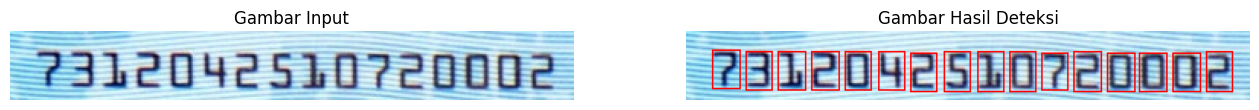

<Figure size 640x480 with 0 Axes>

In [ ]:
gray = cv.cvtColor(cropped_img, cv.COLOR_RGB2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

# Membuat kernel untuk operasi morfologi
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1, 5))

# Terapkan operasi morfologi untuk membersihkan hasil thresholding
thresh = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

# Mencari kontur pada gambar threshold
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Menyiapkan gambar untuk menggambar kontur yang terdeteksi
detected = cropped_img.copy()
nums = []

# Mengiterasi setiap kontur untuk mendeteksi angka
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    # Memfilter kontur berdasarkan ukuran lebar (w) agar hanya angka yang terdeteksi
    if w >= 10 and w <= 20:
        cv.rectangle(detected, (x, y), (x + w, y + h), (0, 0, 255), 1)
        num = cropped_img[y:y + h, x:x + w].copy()
        nums.append(num)

# Menampilkan gambar input dan gambar hasil deteksi angka
print(f'Angka yang terdeteksi : {len(nums)}')
plt.figure(figsize=(16, 8))
plt.subplot(121), plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB), cmap='gray'), plt.title('Gambar Input')
plt.axis('off')
plt.subplot(122), plt.imshow(cv.cvtColor(detected, cv.COLOR_BGR2RGB), cmap='gray'), plt.title('Gambar Hasil Deteksi')
plt.axis('off')
plt.show()
plt.tight_layout()

**Step 3: pengenalan karakter menggunakan pca**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


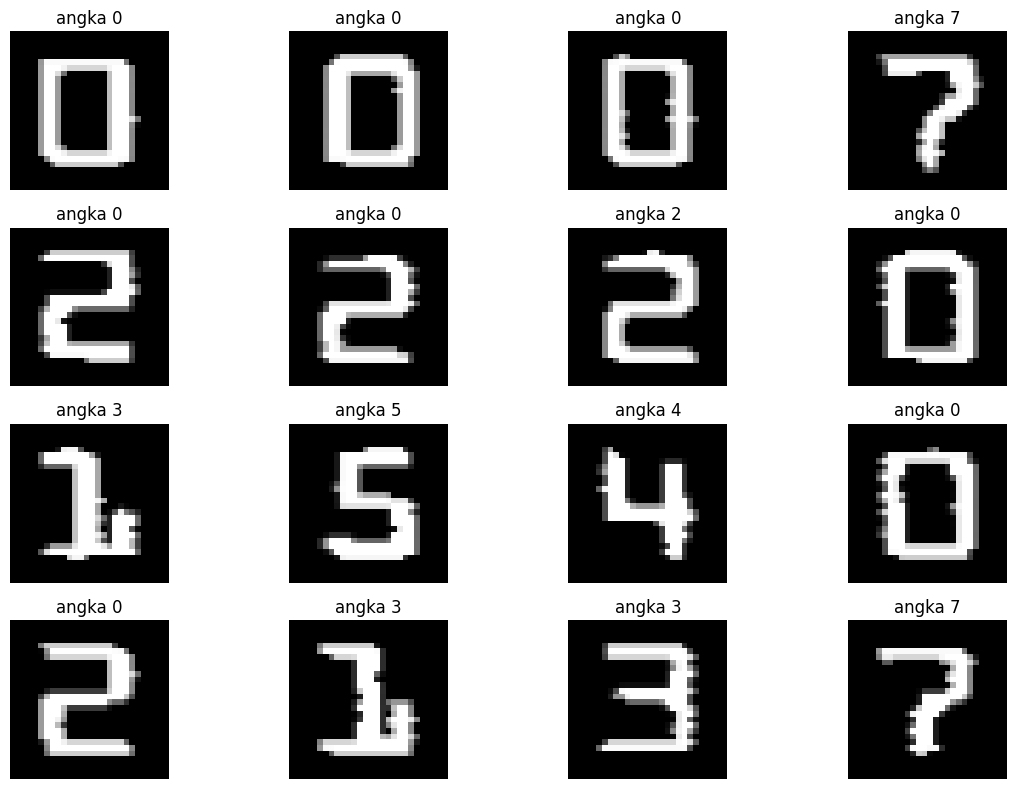

In [ ]:
from sklearn.decomposition import PCA
from tensorflow.keras.models import load_model

# Memuat model yang telah dilatih untuk pengenalan angka (model harus sudah dilatih)
model = load_model('/content/anpr_model.h5')  # Ganti dengan path model yang sudah dilatih

# Membuat figure untuk menampilkan hasil prediksi
fig, axes = plt.subplots(4, 4, figsize=(12, 8))

# Mengiterasi setiap angka yang terdeteksi
for i, num in enumerate(nums):
    # Mengubah gambar angka menjadi grayscale
    num = cv.cvtColor(num, cv.COLOR_BGR2GRAY)

    # Terapkan thresholding biner
    ret, thresh = cv.threshold(num, 127, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

    # Menambahkan border pada gambar untuk menyamakan ukuran
    top, bottom, left, right = 4, 4, 4, 4
    num = cv.copyMakeBorder(thresh, top, bottom, left, right, cv.BORDER_CONSTANT, value=(0, 0, 0))

    # Mengubah ukuran gambar menjadi 28x28 untuk kecocokan dengan model
    num = cv.resize(num, (28, 28))
    num = np.array(num) / 255.0  # Normalisasi nilai pixel

    # PCA untuk ekstraksi fitur
    num_vector = num.reshape((-1, 1))
    pca = PCA(n_components=1)
    num_pca = pca.fit_transform(num_vector)
    num_upscaled = num_pca.reshape(-1, 28, 28, 1)

    # Melakukan prediksi menggunakan model yang telah dilatih
    pred = model.predict(num_upscaled)
    pred = np.argmax(pred)  # Menyimpan angka dengan probabilitas tertinggi

    # Menampilkan hasil prediksi
    axes[i // 4, i % 4].imshow(num_upscaled.reshape(num.shape), cmap='gray')
    axes[i // 4, i % 4].set_title(f'angka {pred}')
    axes[i // 4, i % 4].axis('off')

# Menampilkan hasil semua prediksi dalam satu gambar
plt.tight_layout()
plt.show()
